In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
GDRIVE_DIR='/content/drive/MyDrive/Project_data/msc'
import os
os.chdir(GDRIVE_DIR)
os.getcwd()

'/content/drive/MyDrive/Project_data/msc'

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
apollohosp=pd.read_csv('apollohosp_expsetup1.csv')
apollohosp.head()

,Date,Close,PBDT,RSI,macd,Volume,EPS (Rs),CI
0,2016-01-01,1428.506104,73.0,64.077246,27.112706,107024,5.23,56.635556
1,2016-01-04,1418.042358,73.0,60.422239,25.887594,121226,5.23,59.080965
2,2016-01-05,1436.035645,73.0,64.203471,26.068095,667535,5.23,52.770482
3,2016-01-06,1423.176514,73.0,59.805908,24.886641,233987,5.23,57.806178
4,2016-01-07,1365.774170,73.0,44.991438,19.098288,184861,5.23,54.026040


In [5]:
apollohosp['Date'] = pd.to_datetime(apollohosp['Date'],format='%Y-%m-%d')
apollohosp = apollohosp.set_index('Date')
apollohosp.head()

,Close,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,1428.506104,73.0,64.077246,27.112706,107024,5.23,56.635556
2016-01-04,1418.042358,73.0,60.422239,25.887594,121226,5.23,59.080965
2016-01-05,1436.035645,73.0,64.203471,26.068095,667535,5.23,52.770482
2016-01-06,1423.176514,73.0,59.805908,24.886641,233987,5.23,57.806178
2016-01-07,1365.774170,73.0,44.991438,19.098288,184861,5.23,54.026040


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
apollohosp_norm = scaler.fit_transform(apollohosp)

apollohosp_df = pd.DataFrame(apollohosp_norm,columns=apollohosp.columns,index=apollohosp.index)
apollohosp_df.head()

,Close,PBDT,RSI,macd,Volume,EPS (Rs),CI
Date,,,,,,,
2016-01-01,0.106466,0.049117,0.698908,0.355600,0.008037,0.62549,0.615202
2016-01-04,0.104295,0.049117,0.648042,0.353067,0.009275,0.62549,0.646230
2016-01-05,0.108029,0.049117,0.700664,0.353440,0.056877,0.62549,0.566160
2016-01-06,0.105360,0.049117,0.639465,0.350998,0.019100,0.62549,0.630055
2016-01-07,0.093447,0.049117,0.433295,0.339033,0.014820,0.62549,0.582091


In [68]:
apollohosp_train =apollohosp_df['2016-01-01':'2021-06-30']['Close']
apollohosp_val =apollohosp_df['2021-06-01':'2021-09-30']['Close']
apollohosp_test =apollohosp_df['2021-10-01':]['Close']

In [69]:
apollohosp_train.shape,apollohosp_val.shape,apollohosp_test.shape

((1356,), (85,), (40,))

In [74]:
# creating data set in timeseries
def XY_split(datadf,timestep):
    X=[]
    y=[]
    for i in range(len(datadf)-1-(timestep)):
        X.append(datadf[i:i+timestep])
        y.append(datadf[i+timestep:i+timestep+1])
    return np.array(X),np.array(y)

In [75]:
X_train,y_train = XY_split(apollohosp_train,timestep=28)
X_val,y_val=XY_split(apollohosp_val,timestep=28)
X_test,y_test=XY_split(apollohosp_test,timestep=28)

In [76]:
X_train.shape

(1327, 28)

In [12]:
#n,m,k =X_train.shape
#X_train = X_train.reshape(n,m*k)
#y_train=y_train[:,0]

#n,m,k =X_val.shape
#X_val = X_val.reshape(n,m*k)
#y_val=y_val[:,0]

#n,m,k =X_test.shape
#X_test = X_test.reshape(n,m*k)
#y_test=y_test[:,0]

In [13]:

# set random seed
tf.random.set_seed(42)

# create a simple model
model_lstm1 = tf.keras.Sequential([
        tf.keras.layers.LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
        tf.keras.layers.Dense(1)
])

# Compile
model_lstm1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

# summary
model_lstm1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 196, 50)           10400     
                                                                 
 dense (Dense)               (None, 196, 1)            51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fitting on training data for 20 epochs
history_model_lstm1 = model_lstm1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20)

Epoch 1/20
42/42 [==============================] - 8s 52ms/step - loss: 0.0768 - mae: 0.0768 - val_loss: 0.6365 - val_mae: 0.6365
Epoch 2/20
42/42 [==============================] - 2s 39ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.6365 - val_mae: 0.6365
Epoch 3/20
42/42 [==============================] - 2s 38ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.6587 - val_mae: 0.6587
Epoch 4/20
42/42 [==============================] - 2s 38ms/step - loss: 0.0682 - mae: 0.0682 - val_loss: 0.6492 - val_mae: 0.6492
Epoch 5/20
42/42 [==============================] - 2s 39ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.6627 - val_mae: 0.6627
Epoch 6/20
42/42 [==============================] - 2s 38ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.6595 - val_mae: 0.6595
Epoch 7/20
42/42 [==============================] - 2s 38ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.6588 - val_mae: 0.6588
Epoch 8/20
42/42 [==============================] - 2s 39ms/step - loss: 0.0684 - m

In [17]:
# Adding extra Layer
# set random seed
tf.random.set_seed(42)

# create a simple model
model_lstm2 = tf.keras.Sequential([
        tf.keras.layers.LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
])

# Compile
model_lstm2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae'])

# summary
model_lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 196, 50)           10400     
                                                                 
 dense_2 (Dense)             (None, 196, 50)           2550      
                                                                 
 dense_3 (Dense)             (None, 196, 1)            51        
                                                                 
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fitting on training data for 20 epochs
history_model_lstm2 = model_lstm2.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20)

Epoch 1/20
42/42 [==============================] - 4s 55ms/step - loss: 0.0717 - mae: 0.0717 - val_loss: 0.6388 - val_mae: 0.6388
Epoch 2/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0685 - mae: 0.0685 - val_loss: 0.6403 - val_mae: 0.6403
Epoch 3/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0687 - mae: 0.0687 - val_loss: 0.6520 - val_mae: 0.6520
Epoch 4/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.6458 - val_mae: 0.6458
Epoch 5/20
42/42 [==============================] - 2s 40ms/step - loss: 0.0689 - mae: 0.0689 - val_loss: 0.6729 - val_mae: 0.6729
Epoch 6/20
42/42 [==============================] - 2s 41ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.6542 - val_mae: 0.6542
Epoch 7/20
42/42 [==============================] - 2s 40ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.6566 - val_mae: 0.6566
Epoch 8/20
42/42 [==============================] - 2s 40ms/step - loss: 0.0684 - m

In [21]:
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_lstm3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(56),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_lstm3.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mae'])

# Model summary

history_model_lstm3 = model_lstm3.fit(X_train,y_train,epochs=40,validation_data=(X_val,y_val))

Epoch 1/40
42/42 [==============================] - 4s 55ms/step - loss: 0.0699 - mae: 0.0699 - val_loss: 0.5926 - val_mae: 0.5926
Epoch 2/40
42/42 [==============================] - 2s 39ms/step - loss: 0.0617 - mae: 0.0617 - val_loss: 0.5512 - val_mae: 0.5512
Epoch 3/40
42/42 [==============================] - 2s 39ms/step - loss: 0.0608 - mae: 0.0608 - val_loss: 0.5688 - val_mae: 0.5688
Epoch 4/40
42/42 [==============================] - 2s 39ms/step - loss: 0.0594 - mae: 0.0594 - val_loss: 0.5086 - val_mae: 0.5086
Epoch 5/40
42/42 [==============================] - 2s 40ms/step - loss: 0.0584 - mae: 0.0584 - val_loss: 0.4744 - val_mae: 0.4744
Epoch 6/40
42/42 [==============================] - 2s 40ms/step - loss: 0.0587 - mae: 0.0587 - val_loss: 0.5092 - val_mae: 0.5092
Epoch 7/40
42/42 [==============================] - 2s 39ms/step - loss: 0.0580 - mae: 0.0580 - val_loss: 0.4948 - val_mae: 0.4948
Epoch 8/40
42/42 [==============================] - 2s 40ms/step - loss: 0.0576 - m

-- Here we can see that we must adjust the learning rate

In [24]:
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_lstm4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(56),
    tf.keras.layers.Dense(1)
])

def scheduler(epoch, lr):
    if epoch<5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Compile the model
model_lstm4.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['mse'])

# Model summary

history_model_lstm4 = model_lstm4.fit(X_train,y_train,epochs=60,validation_data=(X_val,y_val),callbacks=[lr_scheduler],verbose=0)

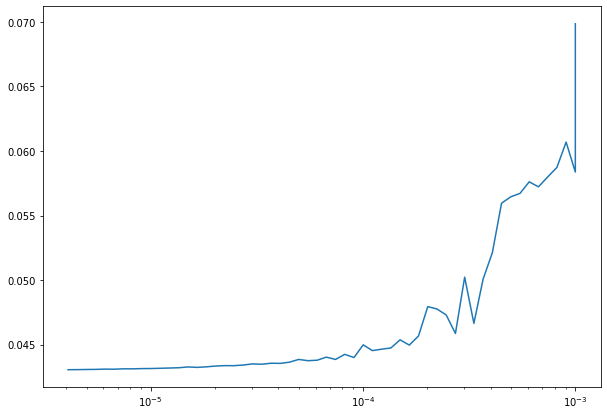

In [25]:
# Plotting the loss vs learning rate
plt.figure(figsize=(10,7))
plt.semilogx(history_model_lstm4.history['lr'],history_model_lstm4.history['loss'])


-- Optimal learning rate looks like near 10^-4 so running more epochs in same cell

In [45]:
# setting optimal learning rate visually
opt_lr = (10**-5)*8
opt_lr

8e-05

In [86]:
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_lstm5 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_lstm5.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mae'])

# Model summary

history_model_lstm5 = model_lstm5.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
42/42 [==============================] - 5s 23ms/step - loss: 0.0959 - mae: 0.0959 - val_loss: 0.5918 - val_mae: 0.5918
Epoch 2/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0520 - mae: 0.0520 - val_loss: 0.3910 - val_mae: 0.3910
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0356 - mae: 0.0356 - val_loss: 0.1547 - val_mae: 0.1547
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0160 - mae: 0.0160 - val_loss: 0.0512 - val_mae: 0.0512
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0464 - val_mae: 0.0464
Epoch 6/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0127 - mae: 0.0127 - val_loss: 0.0444 - val_mae: 0.0444
Epoch 7/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0124 - mae: 0.0124 - val_loss: 0.0432 - val_mae: 0.0432
Epoch 8/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0122 - m

In [79]:
# Though loss decreases let us see if adding layers improve this or not
# also Learning rate seems too low increasing a bit
opt_lr = (10**-5)*9
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_lstm6 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(60,return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_lstm6.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mae'])

# Model summary

history_model_lstm6 = model_lstm6.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
42/42 [==============================] - 5s 41ms/step - loss: 0.0873 - mae: 0.0873 - val_loss: 0.4772 - val_mae: 0.4772
Epoch 2/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0408 - mae: 0.0408 - val_loss: 0.1899 - val_mae: 0.1899
Epoch 3/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0157 - mae: 0.0157 - val_loss: 0.0506 - val_mae: 0.0506
Epoch 4/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0135 - mae: 0.0135 - val_loss: 0.0475 - val_mae: 0.0475
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0462 - val_mae: 0.0462
Epoch 6/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0126 - mae: 0.0126 - val_loss: 0.0435 - val_mae: 0.0435
Epoch 7/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0124 - mae: 0.0124 - val_loss: 0.0451 - val_mae: 0.0451
Epoch 8/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0122 - m

In [80]:
# Adding more epochs (200) for the same model 
# Though loss decreases let us see if adding layers improve this or not
# also Learning rate seems too low increasing a bit
opt_lr = (10**-5)*9
# Create Random seed
tf.random.set_seed(42)

# Create 3rd Model
model_lstm7 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],1)),
    #tf.keras.layers.Dense(196,activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.LSTM(60,return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(1)
])



# Compile the model
model_lstm7.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=opt_lr),
                   metrics=['mae'])

# Model summary

history_model_lstm7 = model_lstm7.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
42/42 [==============================] - 5s 40ms/step - loss: 0.0873 - mae: 0.0873 - val_loss: 0.4772 - val_mae: 0.4772
Epoch 2/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0408 - mae: 0.0408 - val_loss: 0.1899 - val_mae: 0.1899
Epoch 3/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0157 - mae: 0.0157 - val_loss: 0.0506 - val_mae: 0.0506
Epoch 4/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0135 - mae: 0.0135 - val_loss: 0.0475 - val_mae: 0.0475
Epoch 5/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0462 - val_mae: 0.0462
Epoch 6/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0126 - mae: 0.0126 - val_loss: 0.0435 - val_mae: 0.0435
Epoch 7/100
42/42 [==============================] - 1s 18ms/step - loss: 0.0124 - mae: 0.0124 - val_loss: 0.0451 - val_mae: 0.0451
Epoch 8/100
42/42 [==============================] - 1s 18ms/step - loss: 0.

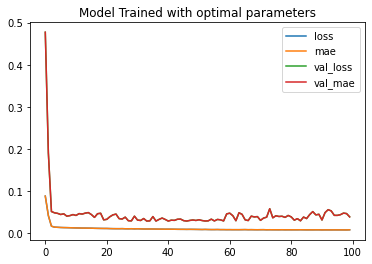

In [81]:
pd.DataFrame(history_model_lstm7.history).plot(title='Model Trained with optimal parameters')

In [87]:
y_pred_train_LSTM1layer = model_lstm5.predict(X_train)
y_pred_test_LSTM1layer = model_lstm5.predict(X_test)

y_pred_train_LSTM2layer = model_lstm7.predict(X_train)
y_pred_test_LSTM_2layer = model_lstm7.predict(X_test)


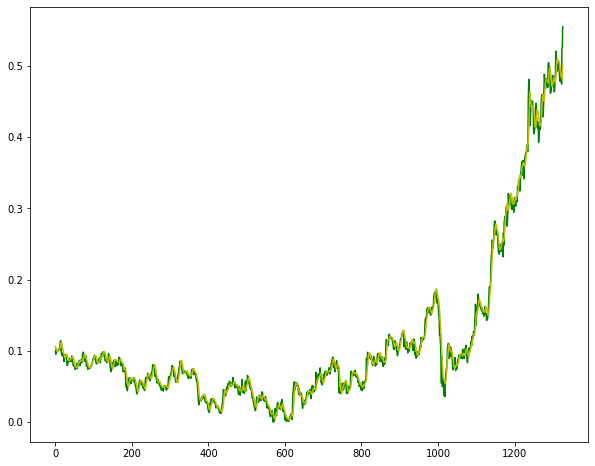

In [84]:
plt.figure(figsize=(10,8))
plt.plot(y_train,'g')
plt.plot(y_pred_train,'y')

In [95]:
results=pd.read_csv('Experimental_Results1.csv')
results = results.drop('Unnamed: 0',axis=1)

In [96]:
# Calculate RMSE and MSE -Single Layer LSTM
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_train,y_pred_train_LSTM1layer)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train_LSTM1layer)/len(y_train))*100,4)

results2 = pd.DataFrame({"Method":['Single Hidden Layer LSTM Train'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0080,0.0066
1,Simple RNN Model Test,4.4195,0.4890
0,Single Hidden Layer LSTM Train,0.0008,0.0152


In [97]:
# Calculate RMSE and MSE -Single Hidden Layer LSTM
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test_LSTM1layer)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test_LSTM1layer)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Single Hidden Layer LSTM Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0080,0.0066
1,Simple RNN Model Test,4.4195,0.4890
0,Single Hidden Layer LSTM Train,0.0008,0.0152
0,Single Hidden Layer LSTM Test,1.2429,0.1446


In [98]:
# Calculate RMSE and MSE -Two Hidden Layer LSTM Train
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_train,y_pred_train_LSTM2layer)).round(4)
mape=np.round(np.mean(np.abs(y_train-y_pred_train_LSTM2layer)/len(y_train))*100,4)

results2 = pd.DataFrame({"Method":['Two Hidden Layer LSTM Train'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0080,0.0066
1,Simple RNN Model Test,4.4195,0.4890
0,Single Hidden Layer LSTM Train,0.0008,0.0152
0,Single Hidden Layer LSTM Test,1.2429,0.1446
0,Two Hidden Layer LSTM Train,0.0005,0.0100


In [99]:
# Calculate RMSE and MSE -Two Hidden Layer LSTM Test
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred_test_LSTM_2layer)).round(4)
mape=np.round(np.mean(np.abs(y_test-y_pred_test_LSTM_2layer)/len(y_test))*100,4)

results2 = pd.DataFrame({"Method":['Two Hidden Layer LSTM Test'],'MAPE':[mape],'RMSE':[rmse]})
results = pd.concat([results,results2],axis=0)
results

,Method,MAPE,RMSE
0,Simple RNN Model Train,0.0080,0.0066
1,Simple RNN Model Test,4.4195,0.4890
0,Single Hidden Layer LSTM Train,0.0008,0.0152
0,Single Hidden Layer LSTM Test,1.2429,0.1446
0,Two Hidden Layer LSTM Train,0.0005,0.0100
0,Two Hidden Layer LSTM Test,0.8983,0.1102


In [100]:
results.to_csv('Experimental_Results1.csv')

In [101]:
model_lstm5.save('1LayerLSTM.h5')

In [102]:
model_lstm7.save('2LayerLSTM.h5')